Data Description
The dataset contains two files:

subject-info.csv contains the participant info at the time of the test. The variable ID identifies a participant, whereas the variable ID_test 
identifies an exercise test. This file contains 992 lines, one for each test. The different variables are described in the table below, with their 
corresponding amount or median [Inter Quartile Range] value.

variable

value

ID_test	992
ID	857
Age (years)	27.10 [21.10, 36.32]
Weight (kg)	73.00 [66.00, 80.23]
Height (cm)	175.00 [170.00, 180.00]
Humidity (%)	47.00 [42.00, 54.00]
Temperature (°C)	22.90 [20.80, 24.40]
Sex = 1 (Female) (%)	149 (15.0)


test_measure.csv, contains all the cardiorespiratory measurements taken during each effort test. The data is in long format, so the file contains one 
line for each breath measurement for all of the 992 effort tests, resulting in the 575087 lines present in the file. The time of each measurement is 
identified by the variable time indicating the seconds elapsed since the effort test start, the exercise test is identified by the ID_test variable,
and the variable ID indicates the participant. These effort tests contain a median [Inter Quartile Range] of 580 [484, 673] measures, for a median 
duration of 1093.00 [978.75, 1208.00] seconds. The variables in this file are:


time	Time since the measurement starts, in seconds
Speed	Speed of the treadmill, in km/h
HR	Heart rate, in beat per min
VO2	Oxygen consumption, in mL/min
VCO2	Carbon dioxide production, in mL/min
RR	Respiration rate, in respiration per minute
VE	Pulmonary ventilation, in L/min
ID	Participant identification
ID_test	Effort test identification
Note that VO2, VCO2, and VE measures are missing for 30 tests.

Usage Notes
ID_test, the variable identifying the GET, is named from the ID of the participant paired with the GET index. For example, ID_date = 245_3 is the third 
exercise test of participant ID = 245. An example of calculation in R [16] of simple heart rate recovery and cardiorespiratory index from these files
is provided in an associated GitHub repository [17].

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


subject_i = pd.read_csv("subject-info.csv")
test_m = pd.read_csv("test_measure.csv")

1. What is the average age of Female athletes who participated in this graded exercise tests?

In [7]:
female=subject_i[subject_i["Sex"]==1]
avg_age= np.mean(female['Age'])
print(avg_age)

26.044966442953022


2. Visualize age distribution of all athletes and display the median value in the chart.
   

0      10.8
1      11.8
2      12.2
3      13.2
4      13.7
       ... 
987    59.1
988    59.7
989    61.3
990    61.6
991    63.0
Name: Age, Length: 992, dtype: float64 28.979133064516127


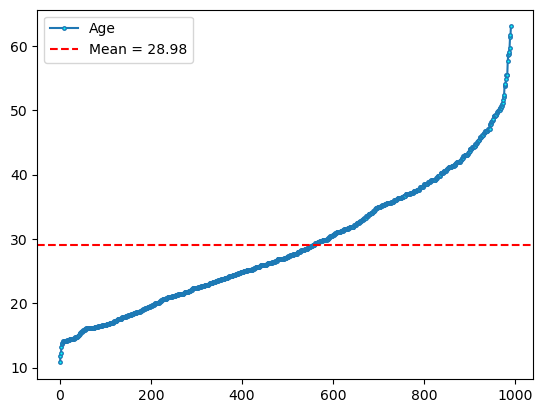

In [10]:
  
plt.plot(subject_i['Age'], label='Age',marker='o', ms=2.5, mfc='cyan')
mean_age=subject_i['Age'].mean()
print(subject_i['Age'],mean_age)

plt.axhline(mean_age, color='red', linestyle='--', label=f'Mean = {mean_age:.2f}')
plt.legend()
plt.show()

3	Find the maximum time taken for all tests and then visualize the distribution of number of tests based on the test duration in minutes. 
Use a line chart and display the count of tests in the chart as well.


               maxtime   Count
suff_testid                   
1            28.533333  489844
2            20.983333    3676
3            22.550000    2119
4            21.400000    3070
5            20.283333    6060
...                ...     ...
128          19.266667     553
149          17.200000     601
166          19.083333     801
212          19.850000     693
371          22.733333     851

[68 rows x 2 columns]


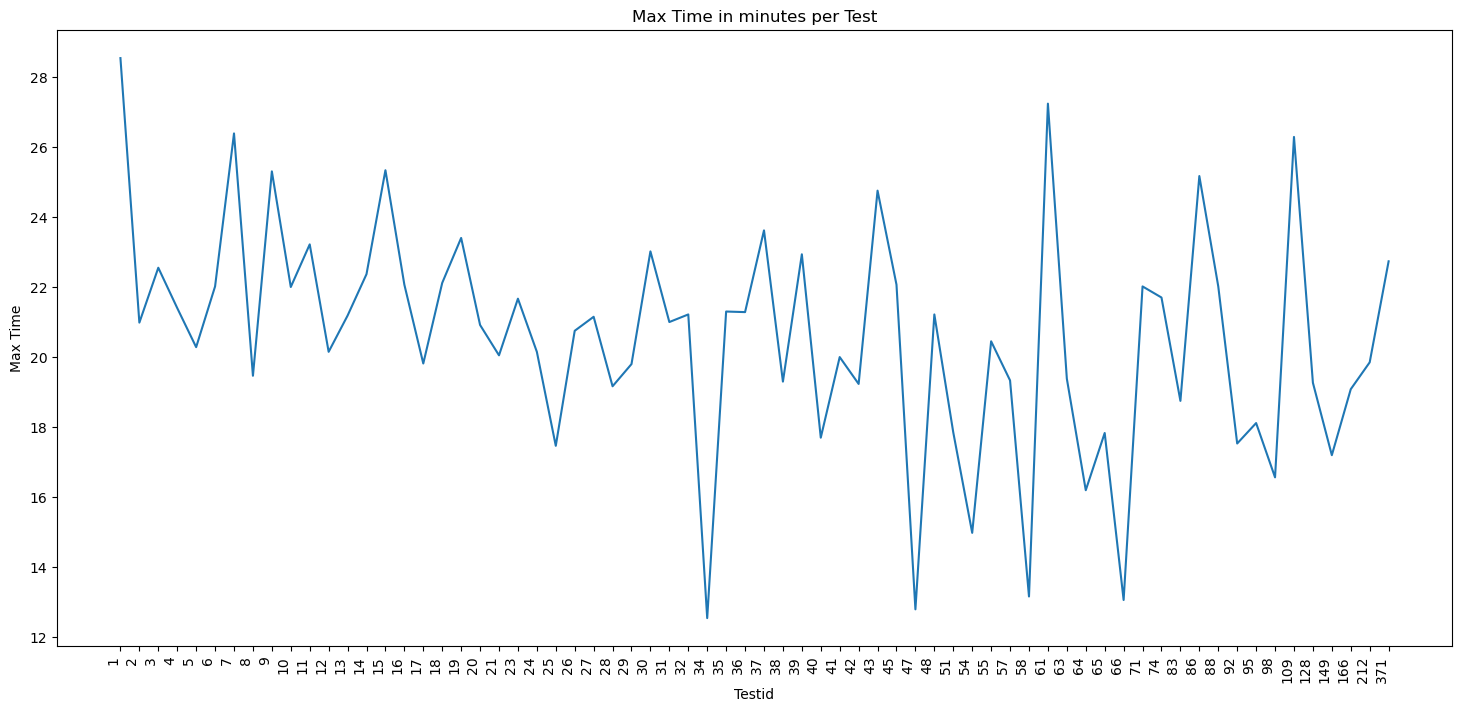

In [13]:
plt.figure(figsize=(18,8))
Time=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
Time['time']=test_m['time']/60

Time['suff_testid']=Time['ID_test'].str.split('_').str[1]

new_t= pd.DataFrame(Time.groupby(['suff_testid'])['time'].max())
new_t = new_t.rename(columns={'time': 'maxtime'})
m2= new_t.sort_values(by='suff_testid', key=lambda x: x.astype(int))
new_t1= pd.DataFrame(Time.groupby(['suff_testid'])['suff_testid'].count())
new_t1 = new_t1.rename(columns={'suff_testid': 'Count'})
merged_df = pd.merge(new_t, new_t1, on='suff_testid', how='inner')
merged_df=merged_df.sort_values(by='suff_testid', key=lambda x: x.astype(int))

print(merged_df)
y=m2['maxtime']

plt.tight_layout()
plt.xticks(rotation=90, ha='right')
plt.plot(y)
plt.title('Max Time in minutes per Test')
plt.xlabel('Testid')
plt.ylabel('Max Time')
plt.show()



4. Display the consolidated list of overweight or obese people based on their BMI.

In [15]:
#BMI = Weight (kg) / [Height (cm)/100] /^2  
#BMI between 25 and 29.9 is considered overweight. 

BMI=pd.DataFrame(subject_i['ID'],columns=['ID'])
BMI['Weight']=subject_i['Weight']
BMI['Height']=subject_i['Height']
BMI['BMI']=subject_i['Weight']/((subject_i['Height']/100)**2)
#BMI['Age']=subject_i['Age']
Overweight= BMI[(BMI['BMI'] > 25) & (BMI['BMI'] < 29.9)]
print(Overweight)

      ID  Weight  Height        BMI
34   134    76.0   173.0  25.393431
40   588    83.0   182.0  25.057360
41    40    77.0   165.0  28.282828
48   590    88.7   178.0  27.995203
54   313    68.0   158.0  27.239224
..   ...     ...     ...        ...
982  597    78.0   175.6  25.295635
985  755    64.0   157.0  25.964542
989  390   102.0   185.0  29.802776
990  596    74.0   169.0  25.909457
991  296    83.5   171.5  28.389532

[264 rows x 4 columns]


5	Create a heatmap to visualize the correlations among any three cardiorespiratory measurements, Age, and BMI.

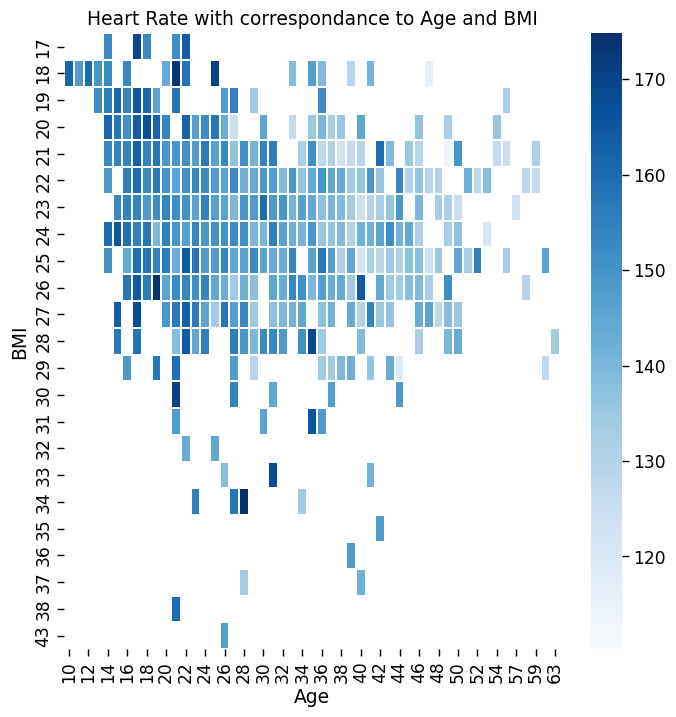

In [19]:
# Need to check
plt.figure(figsize=(8,8))
sns.set_context('paper', font_scale=1.4)

HR_H=pd.DataFrame(subject_i['ID_test'],columns=['ID_test'])
HR_H['Age']=subject_i['Age']
HR_H['BMI']=BMI['BMI']
#print(HR_H)

#grouped = merged_HR.groupby(['ID_test'])['HR'].mean().unstack()


heat=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
heat['HR']=test_m['HR']
heat.fillna(test_m['HR'].mean(), inplace=True)
heat.groupby(['ID_test'])['HR'].mean()
#print(heat)

merged_HR = pd.merge(HR_H, heat, on='ID_test', how='inner')
merged_HR['Age'] = merged_HR['Age'].round(1).astype(int)
merged_HR['BMI'] = merged_HR['BMI'].round(1).astype(int)

#print(merged_HR)
merged_HR = merged_HR.pivot_table(index='BMI', columns='Age', values='HR')
plt.title("Heart Rate with correspondance to Age and BMI")
sns.heatmap(merged_HR, cmap='Blues', linewidth=0.1)
plt.show()


#plt.savefig("heatmap.png")

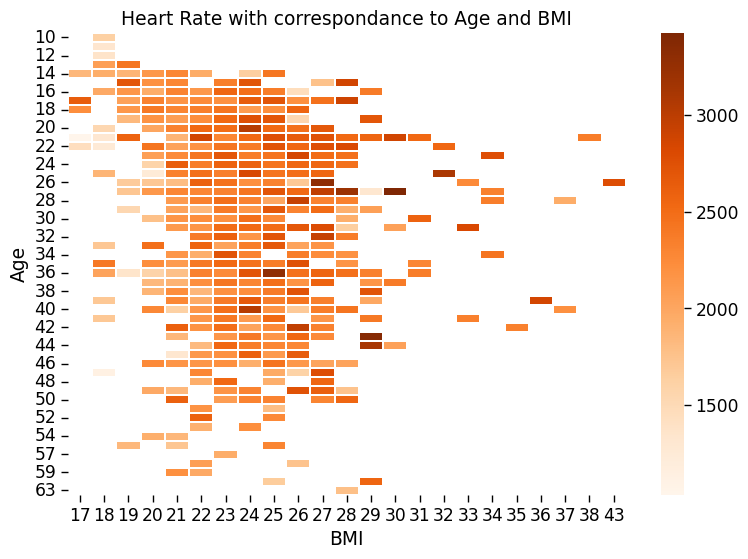

In [20]:

plt.figure(figsize=(9,6))
sns.set_context('paper', font_scale=1.4)

Vo2_H=pd.DataFrame(subject_i['ID_test'],columns=['ID_test'])
Vo2_H['Age']=subject_i['Age']
Vo2_H['BMI']=BMI['BMI']
#print(HR_H)

#grouped = merged_HR.groupby(['ID_test'])['HR'].mean().unstack()


heat=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
heat['VO2']=test_m['VO2']
#heat.fillna(test_m['HR'].mean(), inplace=True)
#heat.groupby(['ID_test'])['HR'].mean()
#print(heat)

merged_vo2 = pd.merge(Vo2_H, heat, on='ID_test', how='inner')
merged_vo2['Age'] = merged_vo2['Age'].round(1).astype(int)
merged_vo2['BMI'] = merged_vo2['BMI'].round(1).astype(int)

#print(merged_HR)
merged_vo2 = merged_vo2.pivot_table(index='Age', columns='BMI', values='VO2')
sns.heatmap(merged_vo2, cmap='Oranges', linewidth=0.1)
plt.title("Heart Rate with correspondance to Age and BMI")
plt.show()
#plt.tight_layout()
#plt.show(block=True)
#plt.savefig("heatmap.png")

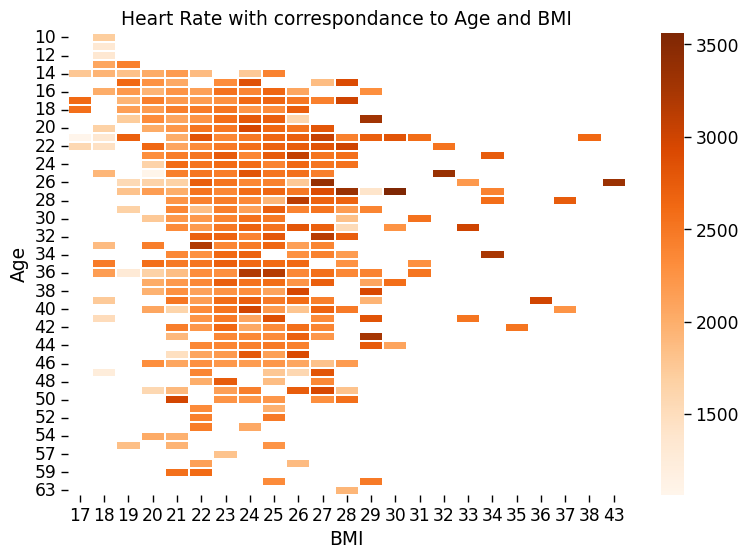

In [22]:
plt.figure(figsize=(9,6))
sns.set_context('paper', font_scale=1.4)

Vco2_H=pd.DataFrame(subject_i['ID_test'],columns=['ID_test'])
Vco2_H['Age']=subject_i['Age']
Vco2_H['BMI']=BMI['BMI']
#print(HR_H)

#grouped = merged_HR.groupby(['ID_test'])['HR'].mean().unstack()


heat=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
heat['VCO2']=test_m['VCO2']
#heat.fillna(test_m['HR'].mean(), inplace=True)
#heat.groupby(['ID_test'])['HR'].mean()
#print(heat)

merged_vco2 = pd.merge(Vco2_H, heat, on='ID_test', how='inner')
merged_vco2['Age'] = merged_vco2['Age'].round(1).astype(int)
merged_vco2['BMI'] = merged_vco2['BMI'].round(1).astype(int)

#print(merged_HR)
merged_vco2 = merged_vco2.pivot_table(index='Age', columns='BMI', values='VCO2')
sns.heatmap(merged_vco2, cmap='Oranges', linewidth=0.1)
plt.title("Heart Rate with correspondance to Age and BMI")
#plt.show()
#plt.tight_layout()
plt.show(block=True)
#plt.savefig("heatmap.png")

6. Generate subplots for second-degree trigonometric functions,using 
x=np.arange(0,4*np.pi,0.1) in object oriented approach.
Label every π interval on X axis.


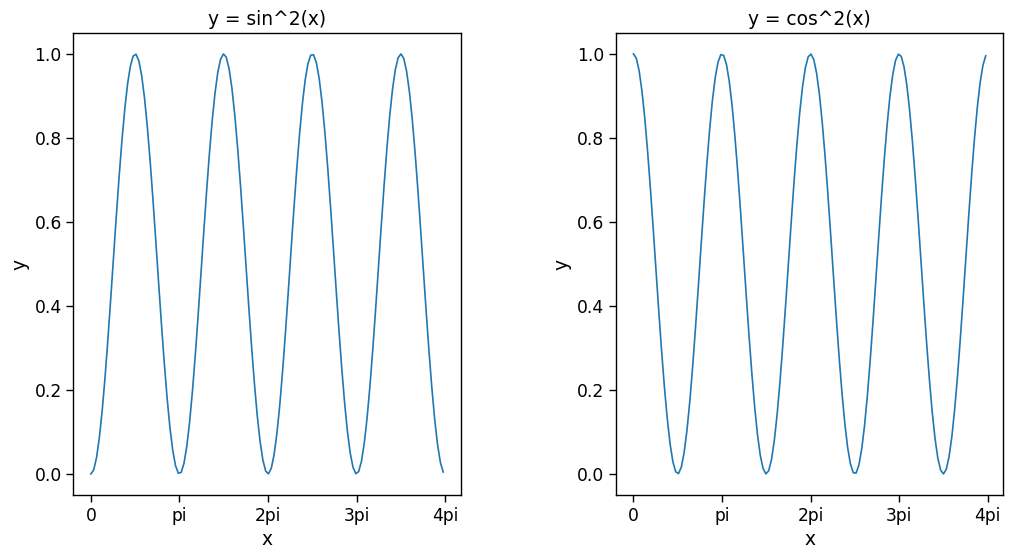

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
x=np.arange(0,4*np.pi,0.1)
y = np.sin(x)**2
plt.plot(x, y)
xticks = [0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi]
xtick_labels = ['0', 'pi', '2pi', '3pi', '4pi']
plt.xticks(xticks, xtick_labels)
plt.title("y = sin^2(x)")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1,2,2)
x=np.arange(0,4*np.pi,0.1)
y = np.cos(x)**2
plt.plot(x, y)
xticks = [0, np.pi, 2*np.pi, 3*np.pi, 4*np.pi]
xtick_labels = ['0', 'pi', '2pi', '3pi', '4pi']
plt.xticks(xticks, xtick_labels)
plt.title("y = cos^2(x)")
plt.xlabel("x")
plt.ylabel("y")


plt.subplots_adjust(wspace=0.4) 

plt.show()


7 Get a number from the user and print its multiplication table from 1 to 10.

In [55]:
n = int(input("Enter an integer number: "))

i=1
print(f"Multiplication table for {n}")
for i in range(1,11):
  m=n*i
  print(f"{n}*{i} ={m}")

  i +=1
  if i == 10:
      break



Enter an integer number:  98


Multiplication table for 98
98*1 =98
98*2 =196
98*3 =294
98*4 =392
98*5 =490
98*6 =588
98*7 =686
98*8 =784
98*9 =882


In [49]:
from mpl_toolkits.mplot3d import Axes3D

8	Write a function to display a correlation matrix between speed of the treadmill and any cardiorespiratory measurement of the athelete.
(Exclude warmup period).


In [57]:
#assuming the Warmup peroid as a HR under 95

CR1=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
CR1['speed']=test_m['Speed']
CR1['HR']=test_m['HR']
CR1=CR1[CR1['HR']>=95]
def display_hr_speed_correlation(df, method='kendall', figsize=(6, 5), annot=True, cmap='coolwarm'):

    df = df.reset_index(drop=True)  
    subset = df[['HR', 'speed']].dropna() 
    corr = subset.corr(method=method)
    # plt.figure(figsize=figsize)
    # sns.heatmap(corr, annot=annot, cmap=cmap, fmt=".2f", square=True, linewidths=0.5)
    # plt.title(f'{method.capitalize()} Correlation between HR and Speed', fontsize=14)
    # plt.xticks()
    # plt.yticks()
    # plt.show()
    return corr

c1= display_hr_speed_correlation(CR1)
print("Below is the correlation matrix for Speed Vs Heart rate:")
print(c1)

Below is the correlation matrix for Speed Vs Heart rate:
             HR     speed
HR     1.000000  0.484358
speed  0.484358  1.000000


In [ ]:
9	What percentage of athletes exceeded 90% of max HR after warm up period? 

10	Which athlete spent the longest time period in this exercise program to complete all of their cardiorespiratory measurements (including the time interval between different test cases)?

In [59]:
Time1=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
Time1['time']=test_m['time']
Time1['ID']=test_m['ID']

time_grp=Time1.groupby(['ID_test'])
t1=time_grp.max()
new_tm=pd.DataFrame(t1.groupby(['ID'])['time'].sum())

max2 =new_tm['time'].idxmax()
max1= new_tm.loc[max2]

print(f'Participant {max2} spent the longest time in the exercise program. Time spent by them is {max1['time']} seconds')

Participant 506 spent the longest time in the exercise program. Time spent by them is 6017 seconds


11	Plot a 3-D graph using any set of random values chosen by you

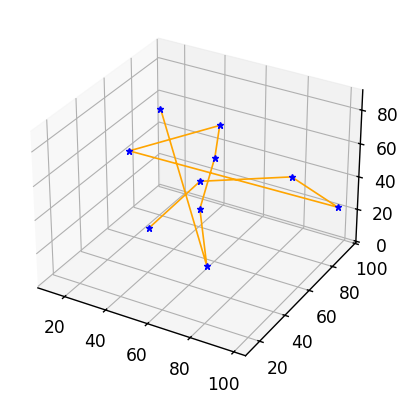

In [61]:
x=np.random.randint(0,100,10)
y=np.random.randint(10,100,10)
z=[1,20,50,23,45,68,78,41,39,90]
fig=plt.figure()  #This creates a new figure canvas using matplotlib.pyplot.figure().
ax = fig.add_subplot(111, projection='3d') #represents your 3D axes object.
ax.plot3D(x, y, z, 'orange', marker='*', mec='b', mfc='blue')
plt.show()

12.connect to database using PostgreSQL and get the details of participants in test 1 and age > 50

In [381]:
select * from subject_info 
where 
"Age" >50
and
rtrim("ID_test") like '%_1'

--Postgres



SyntaxError: invalid syntax (3761381515.py, line 1)

13	Make athelete ID as index to the subject_info table and arrange index in sorted order.

In [65]:
subject_i1=subject_i
subject_i1.set_index('ID', inplace=True)
subject_i1=subject_i1.sort_index()
print(subject_i1)

      Age  Weight  Height  Humidity  Temperature  Sex ID_test
ID                                                           
1    32.7    67.0   173.5       NaN          NaN    0     1_1
2    33.8    68.0   171.1       NaN          NaN    0     2_1
3    16.6    63.8   176.0      43.0         24.6    0     3_1
4    28.5    88.0   181.3       NaN          NaN    0     4_1
5    23.4    85.0   181.4       NaN          NaN    0     5_1
..    ...     ...     ...       ...          ...  ...     ...
855  42.4    61.2   165.6      47.9         22.6    0   855_1
856  58.7    66.0   171.3      38.0         15.0    0   856_1
856  59.1    64.7   172.0      38.0         24.4    0   856_2
856  59.7    65.2   172.0      51.0         16.8    0   856_3
857  29.0    80.1   188.0      53.0         26.3    0   857_1

[992 rows x 7 columns]


 14. Calculate RER (Respiratory Exchange Ratio) , and categorize exercise phase to warmup, moderate, peak exercise according to RER..note: RE=the ratio of carbon dioxide (CO2) produced to oxygen (O2) consumed, 

In [67]:
#test1= test_m
test1=pd.DataFrame(test_m['ID'], columns=['ID'])
test1['VCO2']=test_m['VCO2']
test1['VO2']=test_m['VO2']
test1['ID_test']=test_m['ID_test']
test1['RER'] =test1['VCO2']/test1['VO2']
test1['RER']=test1['RER'].fillna(test1['RER'].mean())
test1.sort_values("RER", inplace=True)

#assuming the RER range from warmup, moderate and peak exercise as 0.5-0.85- 1
#warmup -0.5 to 0.85
#moderate - 0.85 - 1
#peak greater than 1

def categorize(RER):
 if RER >=1 :
    return 'Peak Exercise'

 elif RER >=0.85:
      return 'Moderate Exercise'

 else:
      return 'Warmup'

test1['category'] = test1['RER'].apply(categorize)

print(test1 )

         ID    VCO2     VO2 ID_test        RER       category
201685  305   344.0   678.0   305_1   0.507375         Warmup
212751  330   417.0   821.0   330_1   0.507917         Warmup
201688  305   337.0   660.0   305_1   0.510606         Warmup
351603  518   510.0   998.0   518_1   0.511022         Warmup
201687  305   343.0   671.0   305_1   0.511177         Warmup
...     ...     ...     ...     ...        ...            ...
471228  693  1328.0   500.0   693_1   2.656000  Peak Exercise
557428  831  3316.0  1238.0   831_1   2.678514  Peak Exercise
291563  439   294.0   107.0   439_1   2.747664  Peak Exercise
471227  693  1348.0    82.0   693_1  16.439024  Peak Exercise
471226  693  1350.0    82.0   693_1  16.463415  Peak Exercise

[575087 rows x 6 columns]


15	Calculate the moving average(rolling mean) of HR for participant with ID 2 in a window size of 10 and plot a graph to show both moving average and original HR.

        HR  moving_avg
0     63.0         NaN
1     75.0         NaN
2     82.0         NaN
3     87.0         NaN
4     92.0         NaN
..     ...         ...
597  120.0       121.6
598  120.0       121.2
599  121.0       121.0
600  121.0       120.9
601  121.0       120.8

[602 rows x 2 columns]


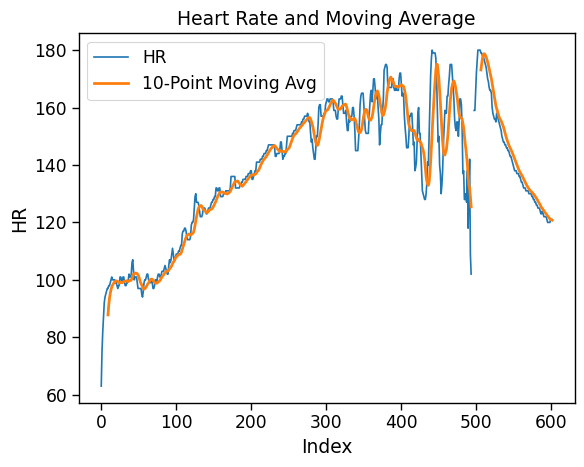

In [69]:
#diab_df[diab_df['Date'] > '2024-08-01']
mov_avg=pd.DataFrame(test_m[test_m['ID']==2], columns=['HR'])

mov_avg['moving_avg'] = mov_avg['HR'].rolling(window=10).mean()
print(mov_avg)
#mov_avg.set_index('ID', inplace=True)
#heat.fillna(test_m['HR'].mean(), inplace=True)



plt.plot(mov_avg['HR'], label='HR')
plt.plot(mov_avg['moving_avg'], label='10-Point Moving Avg', linewidth=2)
plt.title('Heart Rate and Moving Average')
plt.xlabel('Index')
plt.ylabel('HR')
plt.legend()
plt.show()



16	What was the average time each test lasted for all athletes ?

In [71]:
Time=pd.DataFrame(test_m['ID_test'], columns=['ID_test'])
Time['time']=test_m['time']


new_t= pd.DataFrame(Time.groupby(['ID_test'])['time'].max().reset_index())
new_t = new_t.rename(columns={'time': 'maxtime'})
new_t['testid']=new_t['ID_test'].str.split('_').str[1]

new_t2= pd.DataFrame(new_t.groupby(['testid'])['maxtime'].mean().reset_index())
new_t2= new_t2.sort_values(by='testid', key=lambda x: x.astype(int))

print("Below are the average times taken by all the participants for each test:")
print(new_t2)

Below are the average times taken by all the participants for each test:
   testid      maxtime
0       1  1082.424737
15      2  1062.666667
26      3  1143.750000
37      4  1079.400000
45      5  1042.888889
..    ...          ...
5     128  1156.000000
8     149  1032.000000
11    166  1145.000000
18    212  1191.000000
34    371  1364.000000

[68 rows x 2 columns]
